# Plate effect correction with polynomial functions.

Try modelling plate effects as a function to create a smooth surface, and then correct it.

- Not going to handle row or column stripes.
- Should be good at gradients or edge effects.


Turns out nothing is new:
https://journals.sagepub.com/doi/pdf/10.1177/1087057105276989

In [1]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plate_generator
%matplotlib inline

Create some example data.

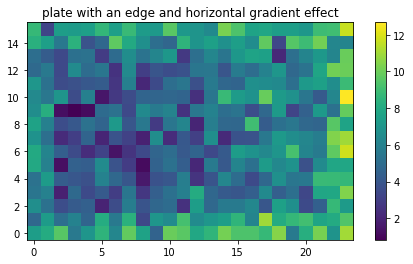

In [2]:
plate = (
    plate_generator.edge_plate1(sigma=1) +
    plate_generator.h_grad_plate(sigma=1)
).data + 5

plt.figure(figsize=[8, 4])
plt.title("plate with an edge and horizontal gradient effect")
plt.imshow(plate, origin="lower")
plt.colorbar()
plt.show()

In [3]:
x, y = np.meshgrid(range(plate.shape[1]), range(plate.shape[0]))
xx = x.flatten()
yy = y.flatten()
data = np.c_[xx, yy, plate.flatten()]

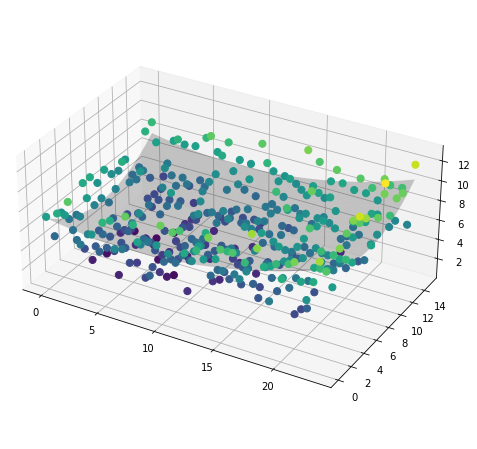

In [4]:
# best-fit quadratic curve
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
# evaluate it on a grid
Z = np.dot(np.c_[np.ones(xx.shape), xx, yy, xx*yy, xx**2, yy**2], C).reshape(x.shape)
#Z = C[4]*x**2. + C[5]*y**2. + C[3]*x*y + C[1]*x + C[2]*y + C[0]

# plot points and fitted surface
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, Z, color="black", rstride=1, cstride=1, alpha=0.2)
ax.scatter(x, y, plate, c=plate, s=50, depthshade=False)
ax.set_box_aspect((np.ptp(x), np.ptp(y), 10))  
ax.axis('tight')
plt.show()

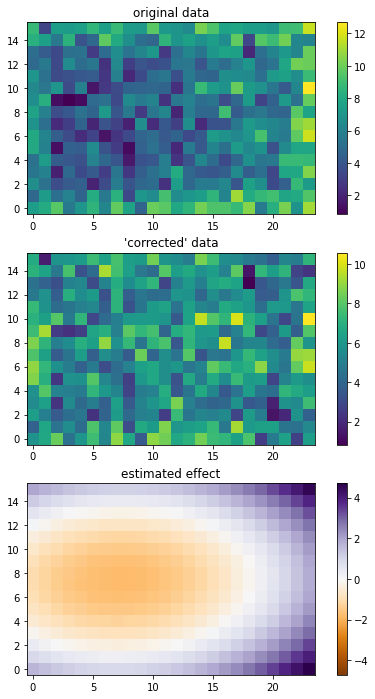

In [5]:
plt.figure(figsize=[8, 12])
plt.subplot(311)
plt.title("original data")
plt.imshow(plate, origin="lower")
plt.colorbar()

correction = Z - np.median(plate)

plt.subplot(312)
plt.title("'corrected' data")
plt.imshow(plate - correction, origin="lower")
plt.colorbar()

v_min, v_max = correction.min(), correction.max()
v_abs_max = max(abs(v_min), abs(v_max))
plt.subplot(313)
plt.title("estimated effect")
plt.imshow(
    correction, origin="lower", cmap="PuOr", vmin=-v_abs_max, vmax=v_abs_max
)
plt.colorbar()
plt.show()